### Experiment v5 – Experience Level

Experience level was derived from years of experience to capture career stage effects.
This abstraction reduces noise and improves interpretability of salary predictions.







In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Salary Predictor/Salary Data.csv")
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
df[['Age', 'Years of Experience', 'Salary']].head(10)


,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
5,29.0,2.0,55000.0
6,42.0,12.0,120000.0
7,31.0,4.0,80000.0
8,26.0,1.0,45000.0
9,38.0,10.0,110000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [6]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level']=df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title']=df['Job Title'].fillna(df['Job Title'].mode()[0])

In [10]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [12]:
def map_industry(job_title):
    title = job_title.lower()

    # Tech & IT
    if any(x in title for x in [
        'software', 'developer', 'engineer', 'it ', 'network', 'architect', 'technical', 'qa'
    ]):
        return 'Tech'

    # Data & Analytics
    elif any(x in title for x in [
        'data', 'analyst', 'scientist', 'analytics', 'bi ', 'business intelligence'
    ]):
        return 'Data / Analytics'

    # Finance
    elif any(x in title for x in [
        'finance', 'financial', 'accountant', 'accounting', 'advisor', 'audit'
    ]):
        return 'Finance'

    # Marketing
    elif any(x in title for x in [
        'marketing', 'seo', 'brand', 'content', 'digital', 'social media'
    ]):
        return 'Marketing'

    # Sales
    elif any(x in title for x in [
        'sales', 'account executive', 'business development', 'customer success'
    ]):
        return 'Sales'

    # HR
    elif any(x in title for x in [
        'hr', 'human resources', 'recruit', 'talent'
    ]):
        return 'HR'

    # Design & Creative
    elif any(x in title for x in [
        'designer', 'ux', 'ui', 'graphic', 'creative', 'copywriter'
    ]):
        return 'Design / Creative'

    # Healthcare
    elif any(x in title for x in [
        'health', 'medical', 'nurse', 'doctor', 'clinical'
    ]):
        return 'Healthcare'

    # Education & Research
    elif any(x in title for x in [
        'research', 'scientist', 'professor', 'teacher', 'education'
    ]):
        return 'Education / Research'

    # Operations & Management (default)
    else:
        return 'Operations / Management'


In [13]:
df['Industry'] = df['Job Title'].apply(map_industry)


In [14]:
df['Industry'].value_counts()


,count
Industry,
Operations / Management,88
Data / Analytics,87
Marketing,60
Tech,41
Sales,34
HR,24
Finance,20
Design / Creative,19
Education / Research,2


In [15]:
df[['Job Title', 'Industry']].sample(15)


,Job Title,Industry
266,Senior Marketing Specialist,Marketing
52,Event Coordinator,Operations / Management
304,Junior Marketing Manager,Marketing
123,Customer Service Manager,Operations / Management
105,Chief Data Officer,Data / Analytics
186,Senior Financial Analyst,Data / Analytics
117,Principal Engineer,Tech
226,Senior Data Scientist,Data / Analytics
60,Director of Operations,Operations / Management
306,Director of Marketing,Marketing


In [16]:
def genearate_company_size():
  company_type= np.random.choice(
      ['startup', 'small', 'medium', 'large'],
      p=[0.25 , 0.30, 0.25 , 0.20]
  )
  return company_type



df['Company_size'] = df.apply(lambda x: genearate_company_size() , axis=1)

In [17]:
df['Company_size'].head()


,Company_size
0,small
1,medium
2,medium
3,startup
4,large


<Axes: >

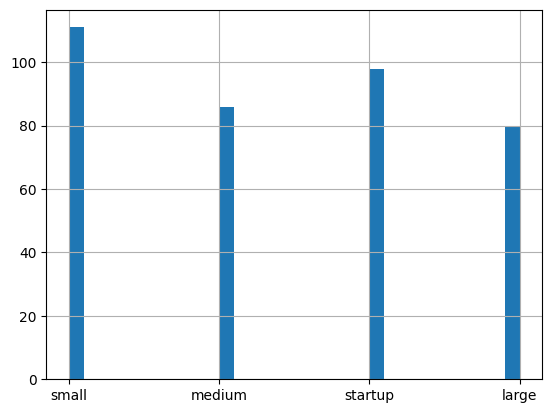

In [18]:
df['Company_size'].hist(bins=30)


In [19]:
def map_experience_level(years):
  if years<=2:
    return 'Entry'
  elif years<=6:
    return 'Mid'
  elif years<=12:
    return 'Senior'
  else:
    return 'Lead'

In [20]:
df['Experience_level']= df['Years of Experience'].apply(map_experience_level)

In [22]:
df[['Years of Experience', 'Experience_level']].sample(10)


,Years of Experience,Experience_level
326,15.0,Lead
5,2.0,Entry
313,4.0,Mid
330,3.0,Mid
340,8.0,Senior
371,19.0,Lead
107,7.0,Senior
226,18.0,Lead
364,8.0,Senior
69,18.0,Lead


In [23]:
#seperating features from target
X= df.drop('Salary', axis=1)  #features
y=df['Salary']                # salary

In [24]:
categorical_cols = ['Gender', 'Education Level', 'Job Title','Industry','Company_size', 'Experience_level']
numerical_cols=['Age', 'Years of Experience']

In [25]:
#applying one hot encoding
x_encoded=pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [26]:
x_encoded.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Industry_Marketing,Industry_Operations / Management,Industry_Sales,Industry_Tech,Company_size_medium,Company_size_small,Company_size_startup,Experience_level_Lead,Experience_level_Mid,Experience_level_Senior
0,32.0,5.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,28.0,3.0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,45.0,15.0,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
3,36.0,7.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4,52.0,20.0,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [27]:
#standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_encoded[numerical_cols]=scaler.fit_transform(x_encoded[numerical_cols])

In [28]:
#performing train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x_encoded, y, test_size=0.2 , random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

(300, 192)
(75, 192)


In [30]:
#Model 1-linear Regression
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [31]:
#making Predictions
y_pred_lr = lr_model.predict(X_test)


In [32]:
#evaluation of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import numpy as np


In [33]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression model Results:")
print("MAE:", mae)
print("RMsE:", rmse)
print("R2 score:", r2)

Linear Regression model Results:
MAE: 13225.492174123048
RMsE: 19559.688090890562
R2 score: 0.8421068582388544


In [34]:
#Model 2 - Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100 , random_state=42)
rf_model.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred_rf = rf_model.predict(X_test)

In [36]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest model Results:")
print("MAE:", mae_rf)
print("RMsE:", rmse_rf)
print("R2 score:", r2_rf)


Random Forest model Results:
MAE: 10690.0
RMsE: 16416.68358713172
R2 score: 0.8887729876518753


### Conclusion
Replacing numeric years of experience with categorical experience level resulted in reduced model performance.
Numeric experience was retained due to its higher information content.

